In [1]:
%load_ext autoreload
%autoreload 2

Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
Hopkins Statistic (1=clustered, 0.5=random, 0=uniforrm) : 0.903
[k=3] Best run is 0 (out of 10) with Calinski-Harabasz score = 1393.347
[k=4] Best run is 0 (out of 10) with Calinski-Harabasz score = 1599.031
[k=5] Best run is 1 (out of 10) with Calinski-Harabasz score = 1904.68
[k=6] Best run is 8 (out of 10) with Calinski-Harabasz score = 1705.988
[k=7] Best run is 8 (out of 10) with Calinski-Harabasz score = 1572.11
[k=8] Best run is 9 (out of 10) with Calinski-Harabasz score = 1498.22
[k=9] Best run is 9 (out of 10) with Calinski-Harabasz score = 1458.474
[k=10] Best run is 4 (out of 10) with Calinski-Harabasz score = 1432.064


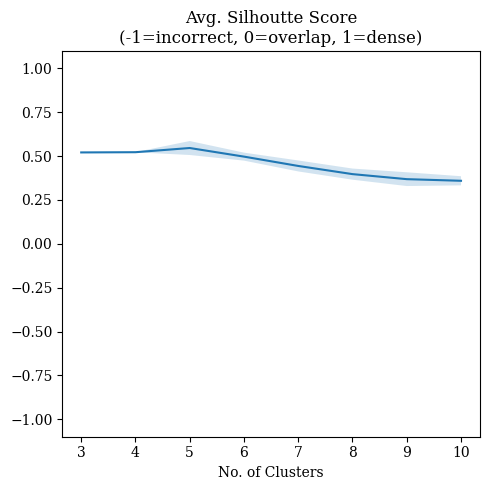

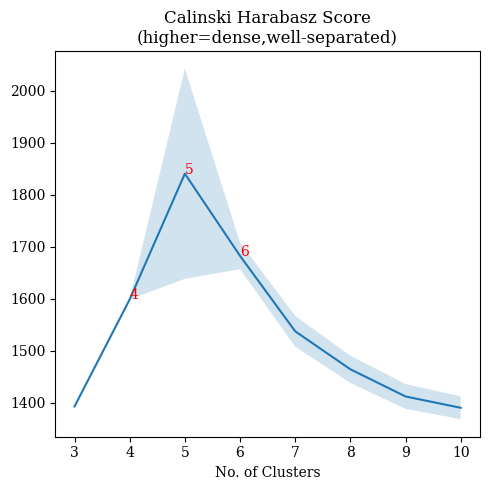

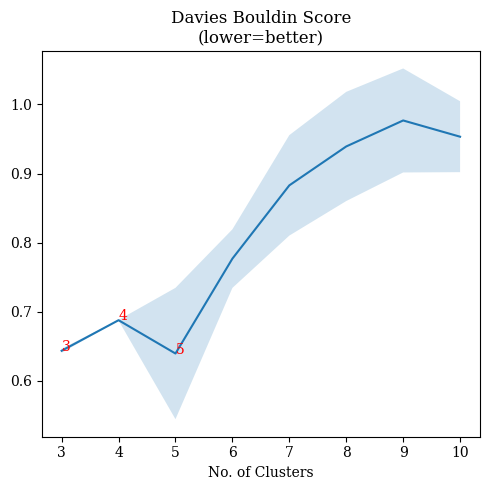

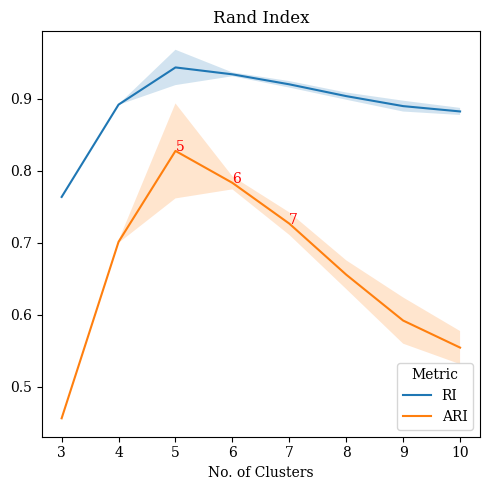

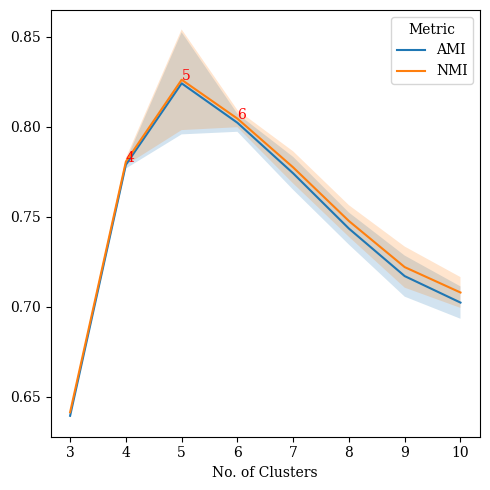

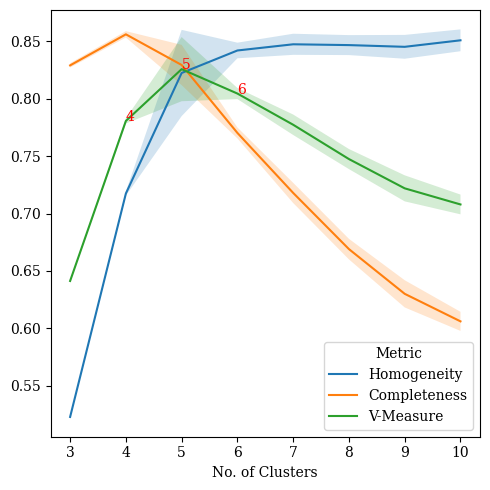

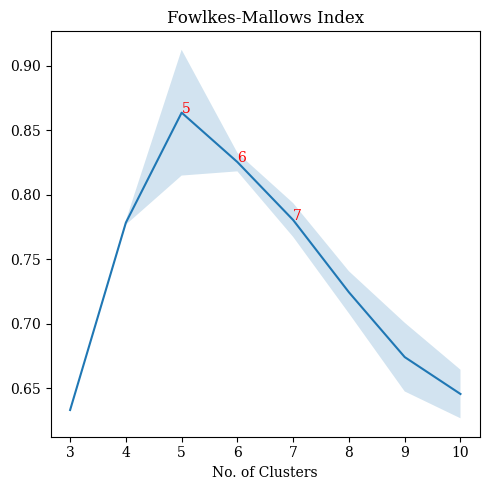

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, collections
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from torch import mode

from eval_clustering import eval_clustering

## Load the iris dataset
# data = datasets.load_digits()
# X = data.data
# y = data.target

X, y = datasets.make_blobs(n_samples=5*100, 
                           centers=5, 
                           n_features=2, 
                           random_state=0)

## Setup model
model = KMeans()
model_params = {'init':'k-means++', 'n_init':1}
n_clusters_param_name='n_clusters'

# model = GaussianMixture()
# model_params = {'covariance_type':'full', 'n_init':1}
# n_clusters_param_name='n_components'

## Run the evaluation
range_clusters = list(range(3,10+1))
labelled_datapoints, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                    model=model, model_params=model_params, n_clusters_param_name=n_clusters_param_name,
                                    num_clusters=range_clusters, num_runs=10,
                                    annotate_topN_best_scores=True, annotN=3,
                                    make_metrics_plots=True,
                                    make_silhoutte_plots=False,
                                    show=True, 
                                    save=True, RESULTS_DIR=os.getcwd()+'/results',
                                )

Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
Hopkins Statistic (1=clustered, 0.5=random, 0=uniforrm) : 0.906
[k=3] Best run is 3 (out of 10) with Calinski-Harabasz score = 1393.356
Plotting first 2 features of the data...
Saving silhouette plot for k=3 at /home/rgura001/clustutils4r/src/clustutils4r/results/silhouette_plots/3_silhouette_plot.png


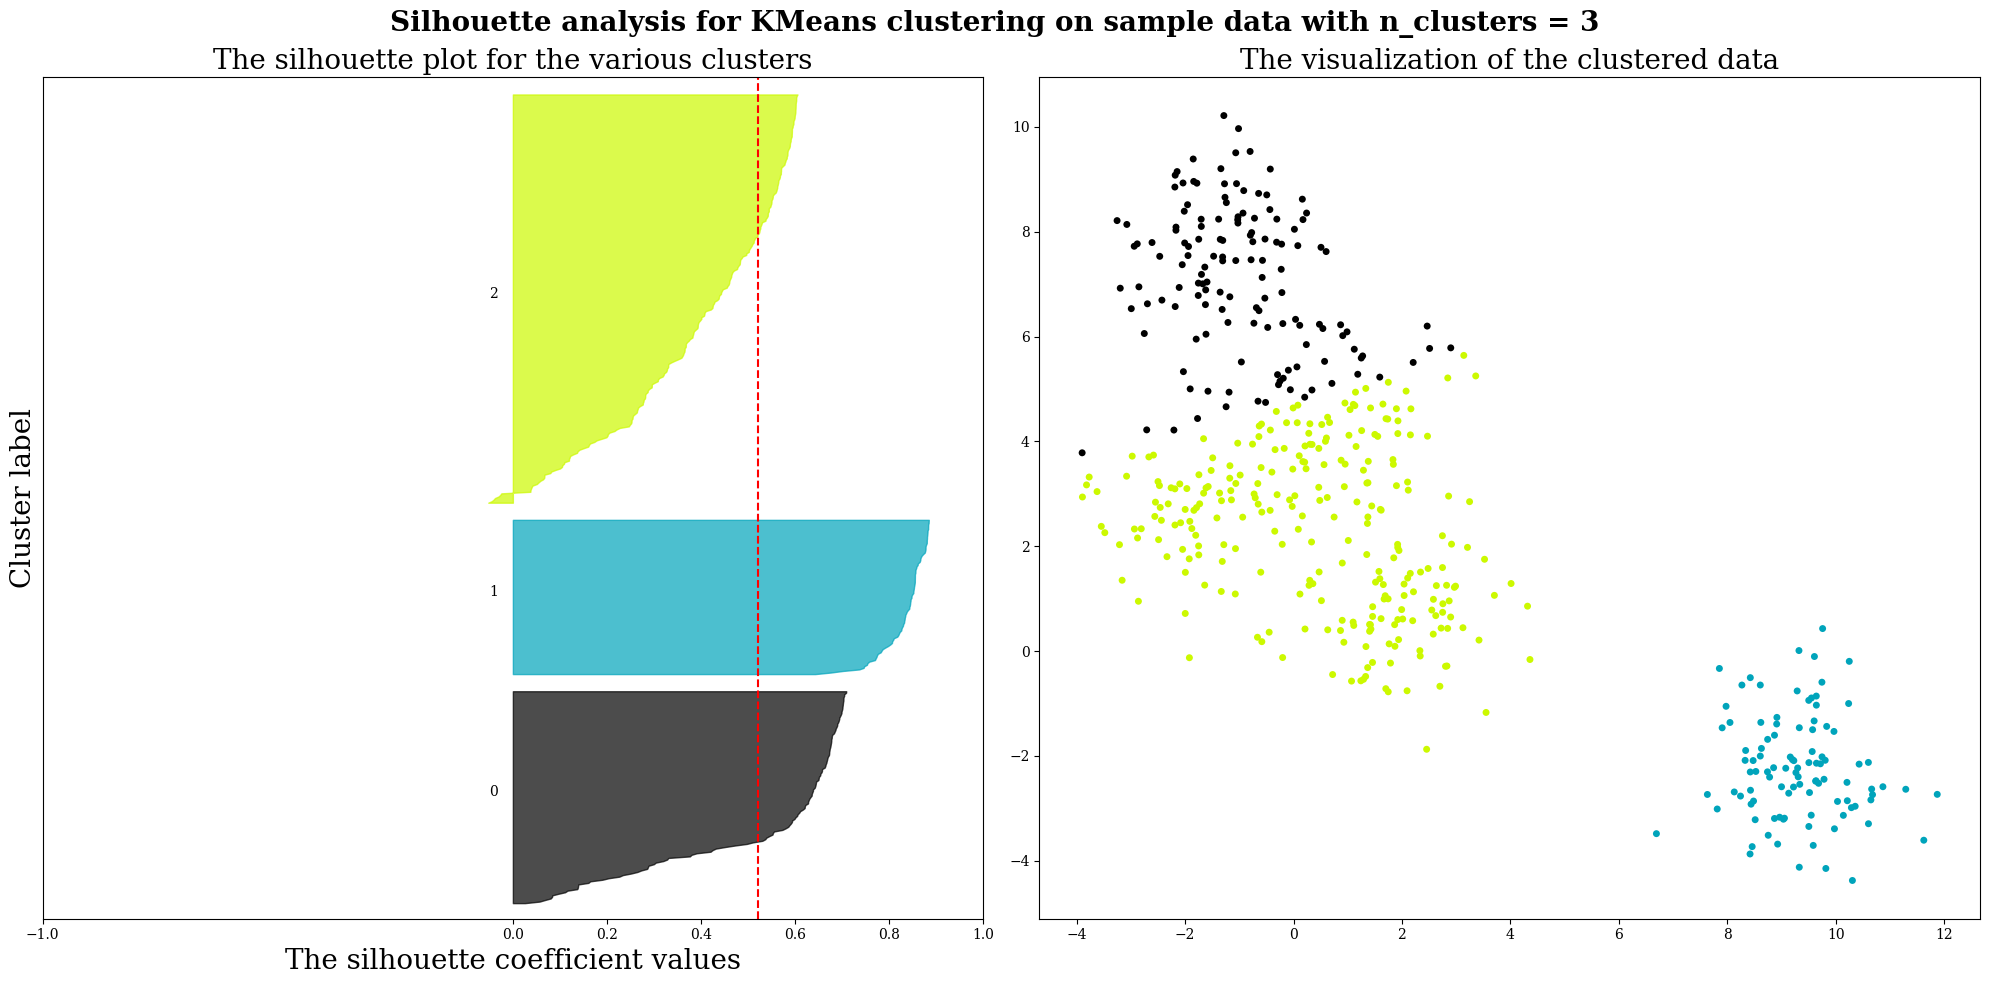

[k=5] Best run is 0 (out of 10) with Calinski-Harabasz score = 1904.68
Plotting first 2 features of the data...
Saving silhouette plot for k=5 at /home/rgura001/clustutils4r/src/clustutils4r/results/silhouette_plots/5_silhouette_plot.png


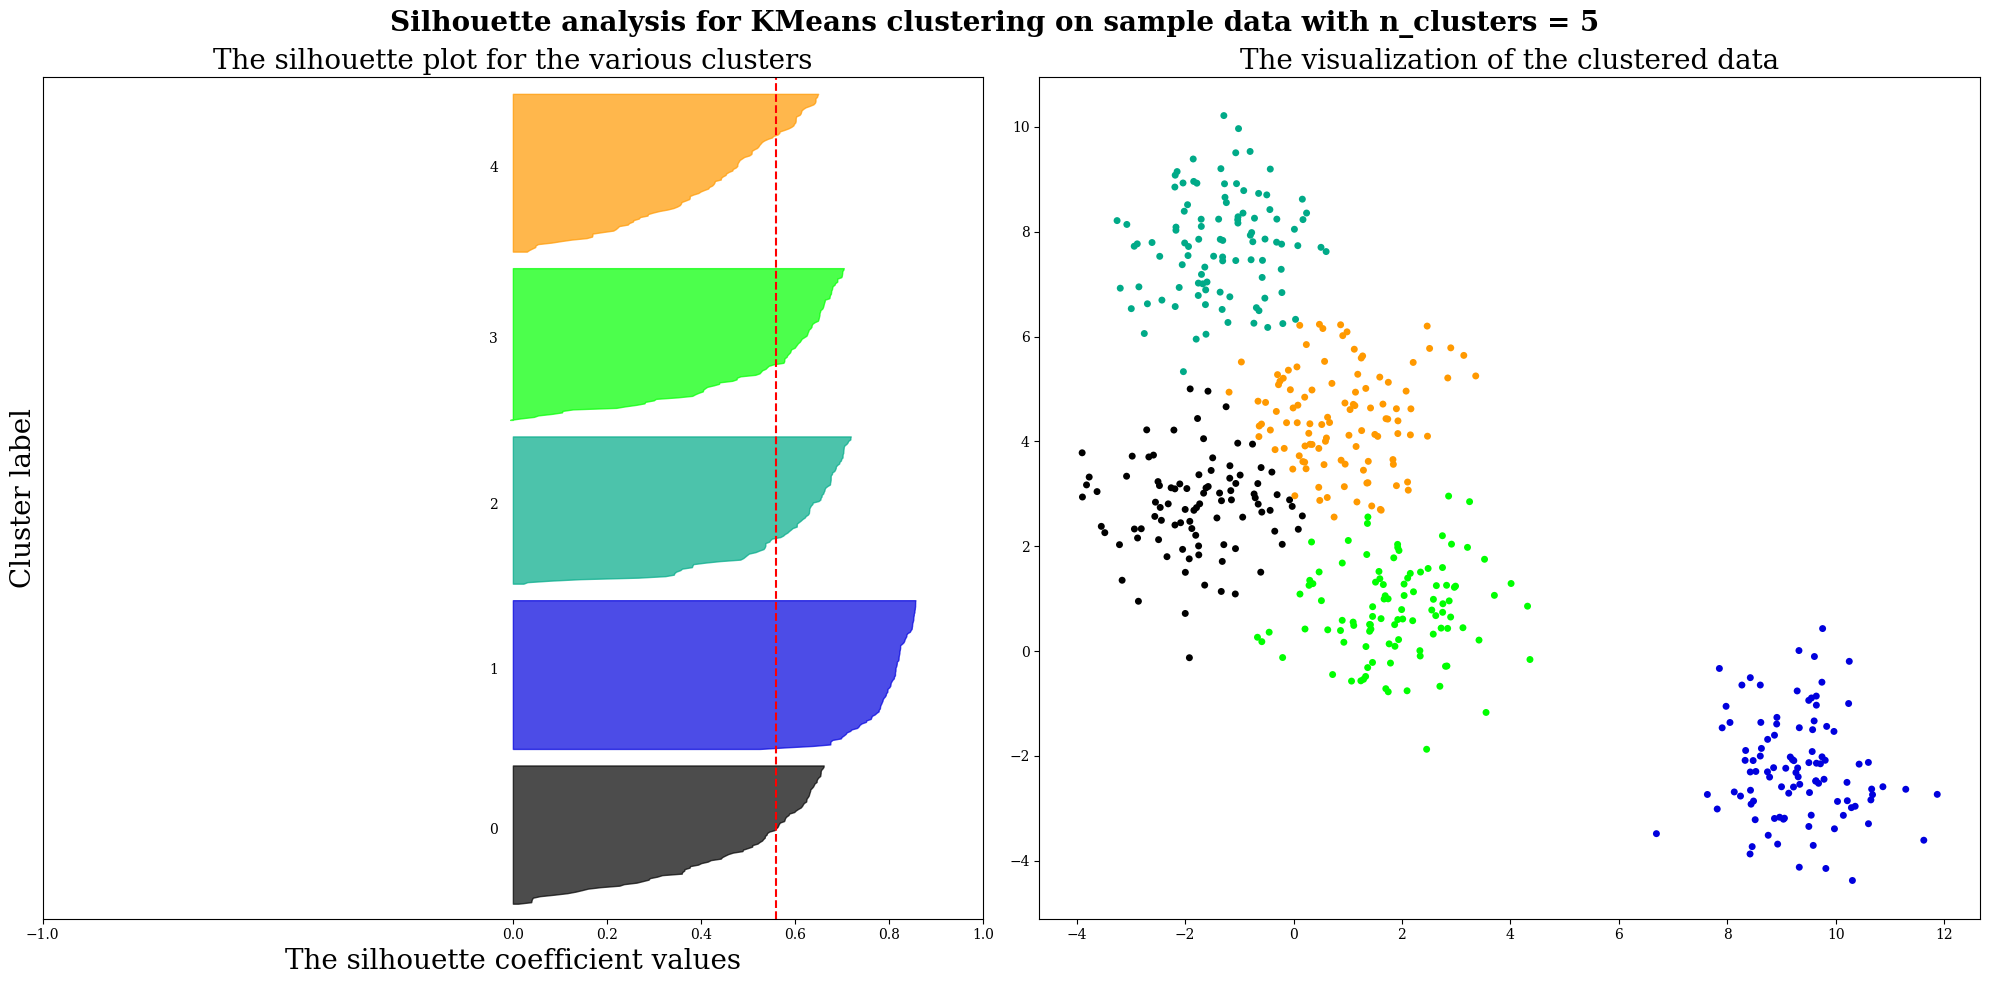

[k=7] Best run is 8 (out of 10) with Calinski-Harabasz score = 1578.259
Plotting first 2 features of the data...
Saving silhouette plot for k=7 at /home/rgura001/clustutils4r/src/clustutils4r/results/silhouette_plots/7_silhouette_plot.png


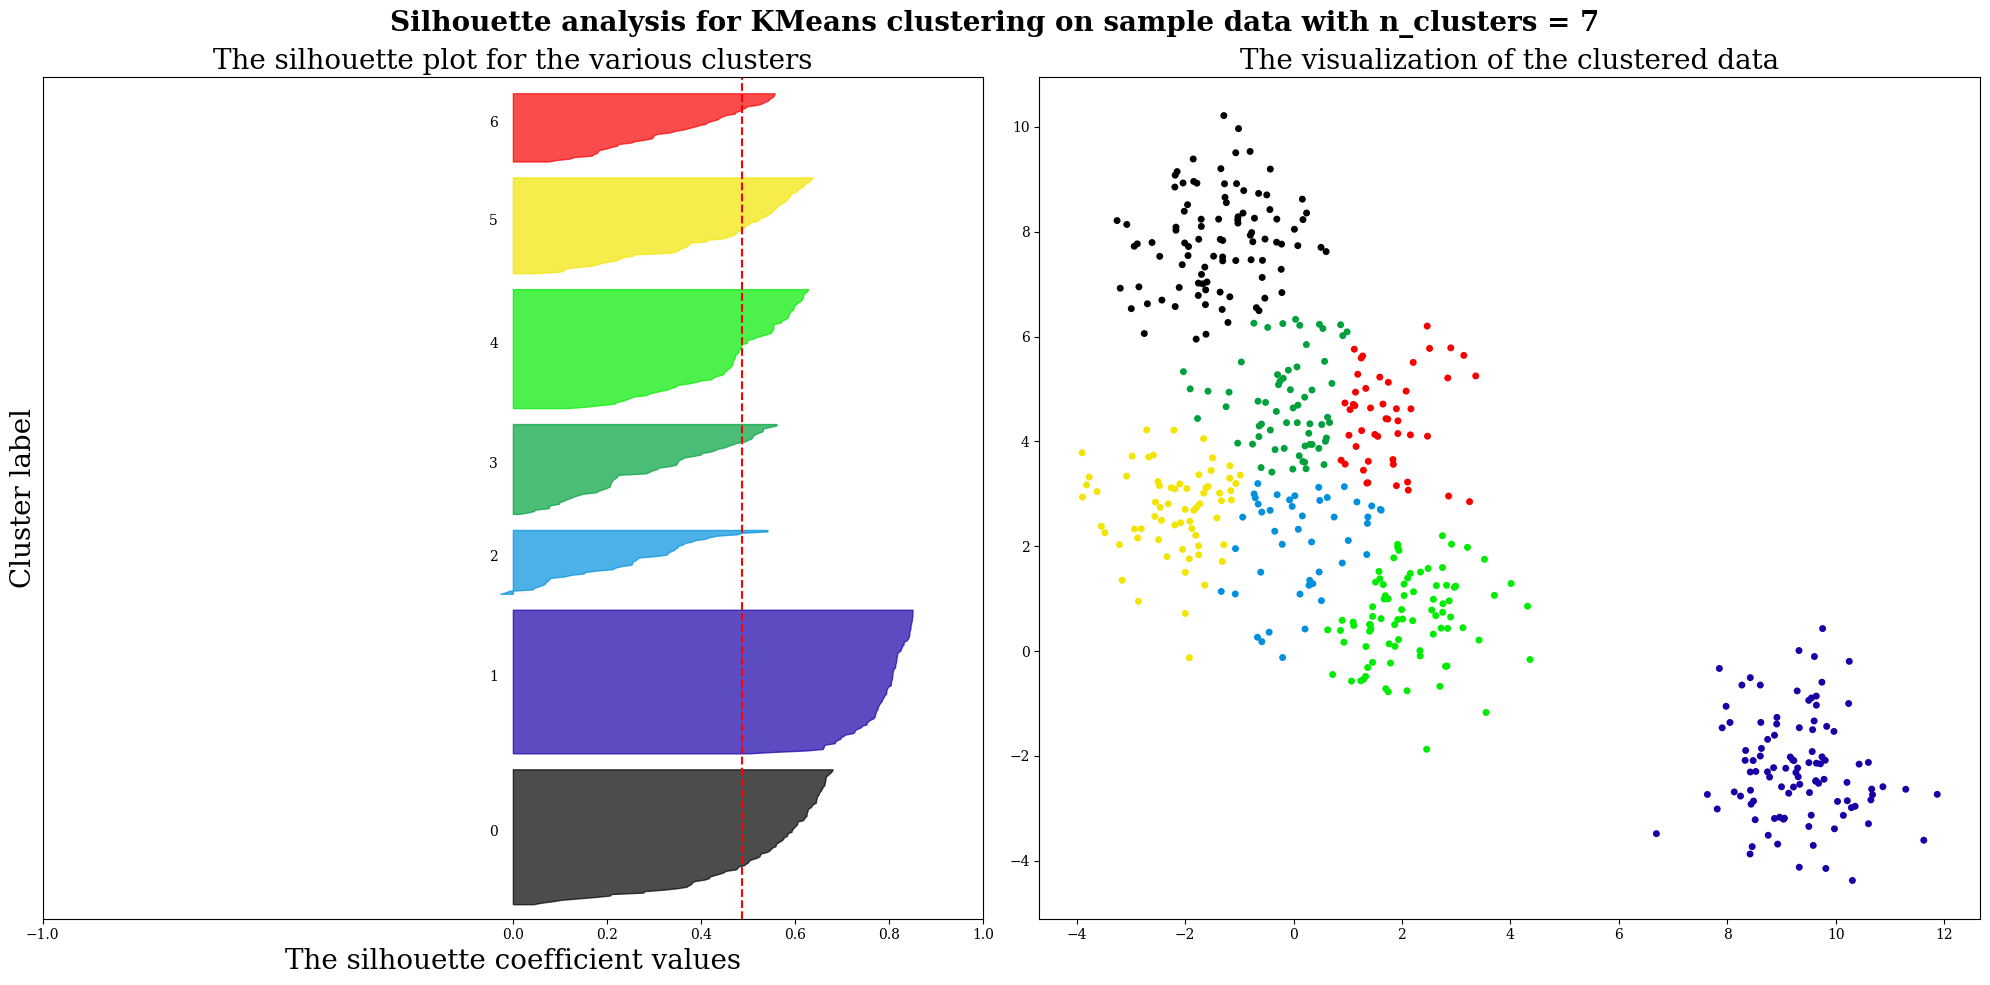

In [3]:
from eval_clustering import eval_clustering

range_clusters = [3, 5, 7]
labelled_segs, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                    model=KMeans(),
                                    num_clusters=range_clusters, 
                                    make_metrics_plots=False,
                                    make_silhoutte_plots=True, embed_data_in_2d=False,
                                    show=True, 
                                    save=True, RESULTS_DIR=os.getcwd()+'/results',
                                 )